# ANUKRITI SHARMA

# TASK 3:-  Exploratory Data Analysis of a Retail Store -To know profit making and weak areas -Business Suggestions

LOADING THE LIBRARIES

In [2]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

IMPORTING THE DATASET

In [3]:
df=pd.read_csv("C:/Users/DELL/Downloads/SampleSuperstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


INFORMATION ABOUT THE DATASET

In [3]:
df.shape

(9994, 13)

This dataset contains 9994 rows and 13 columns

In [4]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

These are the names of the columns present in this dataset.

CHECKING THE MISSING VALUES

In [5]:
df.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

So, from the above two codes we conclude that there are no null values in this dataset.

In [7]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

DATA PREPROCESSING

In [8]:
df.duplicated().sum()

17

In [9]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


DELETING THE VARIABLE

In [10]:
# Deleting the non-useful variable
col=['Postal Code']
df1=df.drop(columns=col,axis=1)

 Find the Series containing counts of unique values

In [11]:
df.value_counts()

Ship Mode       Segment      Country        City           State       Postal Code  Region   Category         Sub-Category  Sales    Quantity  Discount  Profit  
Second Class    Corporate    United States  Chicago        Illinois    60653        Central  Office Supplies  Binders       3.564    3         0.8       -6.2370     2
Standard Class  Consumer     United States  Salem          Oregon      97301        West     Office Supplies  Paper         10.368   2         0.2        3.6288     2
                                            San Francisco  California  94122        West     Office Supplies  Paper         12.840   3         0.0        5.7780     2
                Corporate    United States  Seattle        Washington  98105        West     Office Supplies  Paper         19.440   3         0.0        9.3312     2
                Home Office  United States  Columbus       Ohio        43229        East     Furniture        Chairs        281.372  2         0.3       -12.0588    2
   

# Proper Visualization of the data set

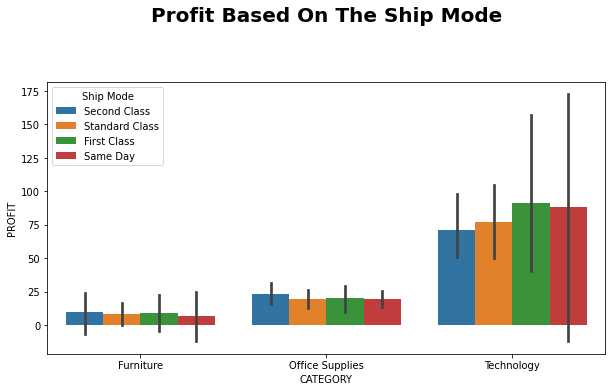

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x='Category', y='Profit', hue='Ship Mode', data=df);
plt.title('Profit Based On The Ship Mode',fontsize=20, fontweight='bold',y=1.2,loc="center")
plt.xlabel('CATEGORY')
plt.ylabel('PROFIT')
plt.show()

Here Profit of technology is the highest for all the classes as compared to the furuniture and office supplies

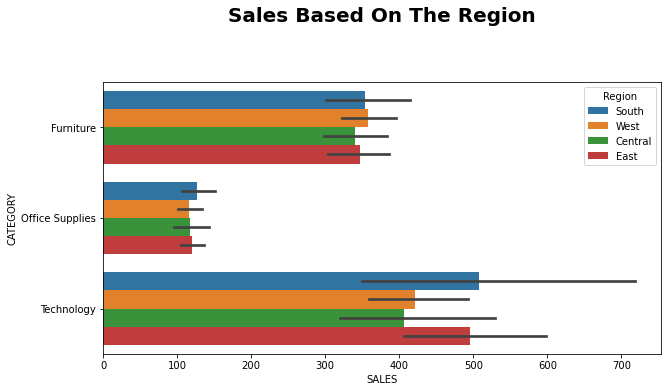

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x='Sales', y='Category', hue='Region', data=df);
plt.title('Sales Based On The Region',fontsize=20, fontweight='bold',y=1.2,loc="center")
plt.xlabel('SALES')
plt.ylabel('CATEGORY')
plt.show()

Here Sales of the south region is highest in every category that is Furniture, Office Supplies and Technology 

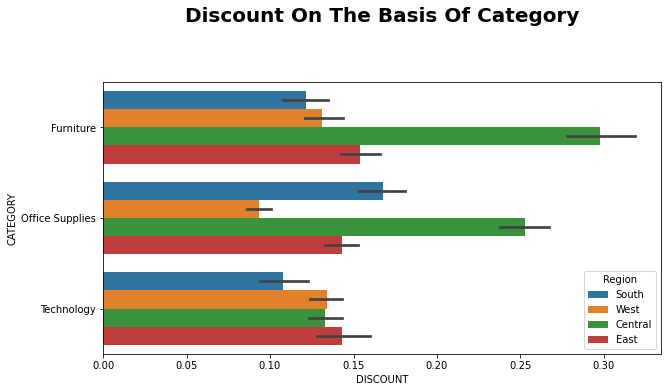

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x='Discount', y='Category', hue='Region', data=df);
plt.title('Discount On The Basis Of Category',fontsize=20, fontweight='bold',y=1.2,loc="center")
plt.xlabel('DISCOUNT')
plt.ylabel('CATEGORY')
plt.show()

Here Discount is high in the central region for Furniture and Office Supplies whereas in the case of Technology discount is 
high in the east region.

### Region and Category vs Sales

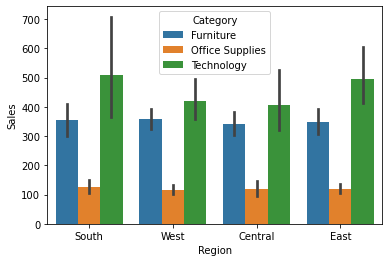

In [15]:
sns.barplot(x='Region',y='Sales',hue='Category',data=df);

Here Sales of technology is highest in the south region

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


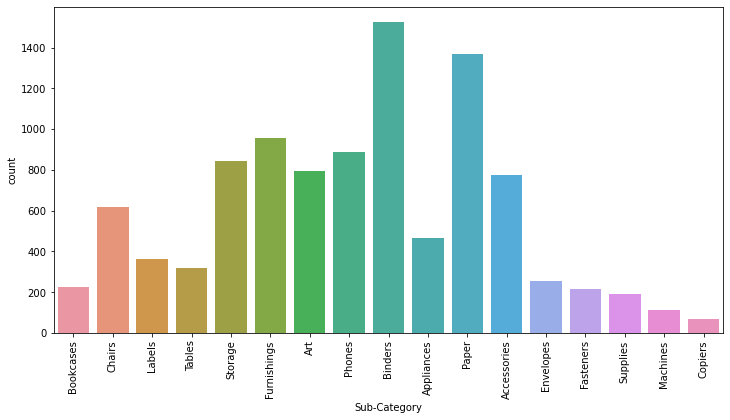

In [16]:
print(df['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

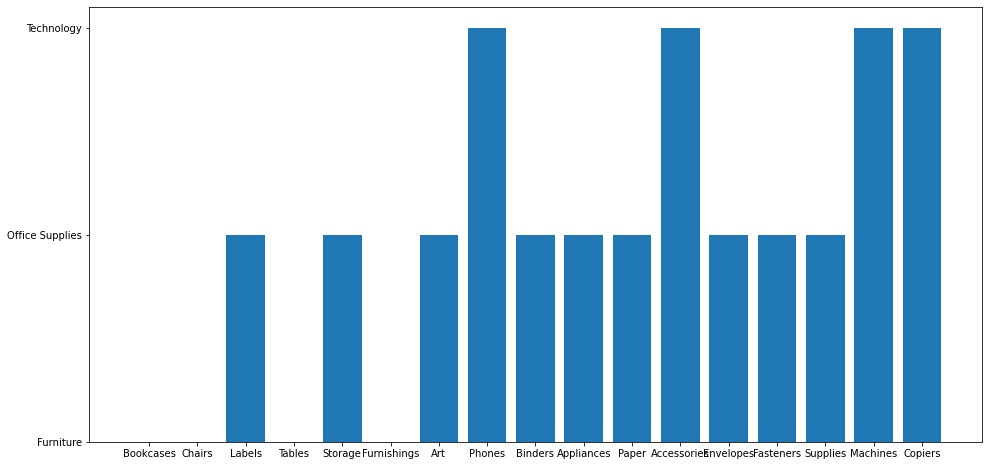

In [4]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=df)
plt.show()

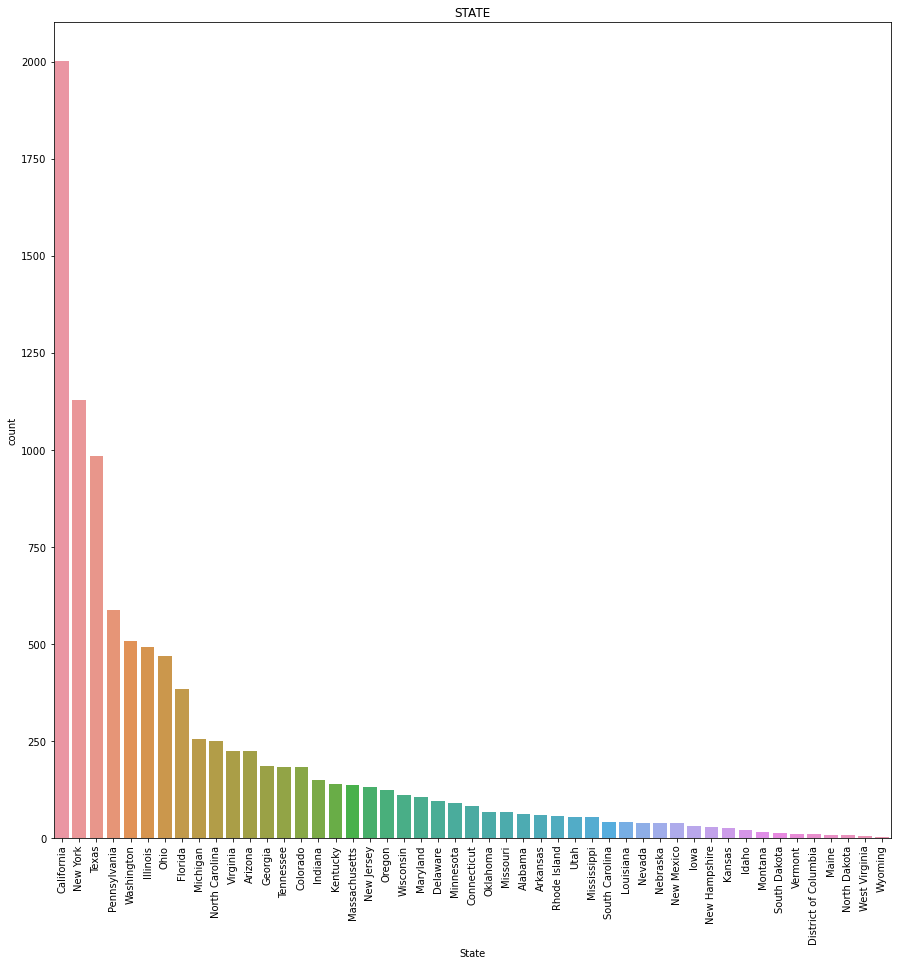

In [18]:
#count of states in our data
plt.figure(figsize=(15,15))
sns.countplot(x=df['State'],order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()


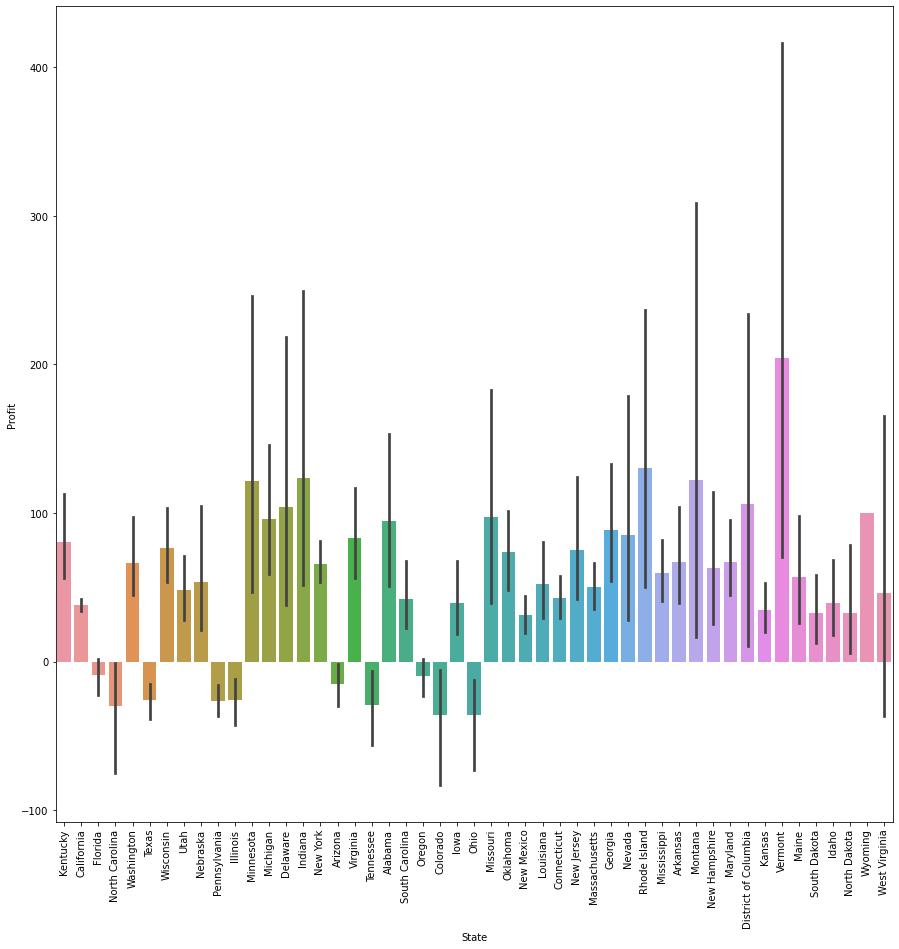

In [19]:
#state-wise profit 
plt.figure(figsize=(15,15))
sns.barplot(x='State',y='Profit',data=df)
plt.xticks(rotation=90)
plt.show()

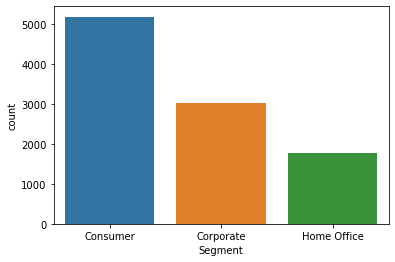

In [20]:
sns.countplot(x=df['Segment']);

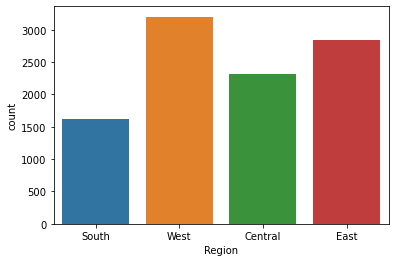

In [21]:
sns.countplot(x=df['Region']);

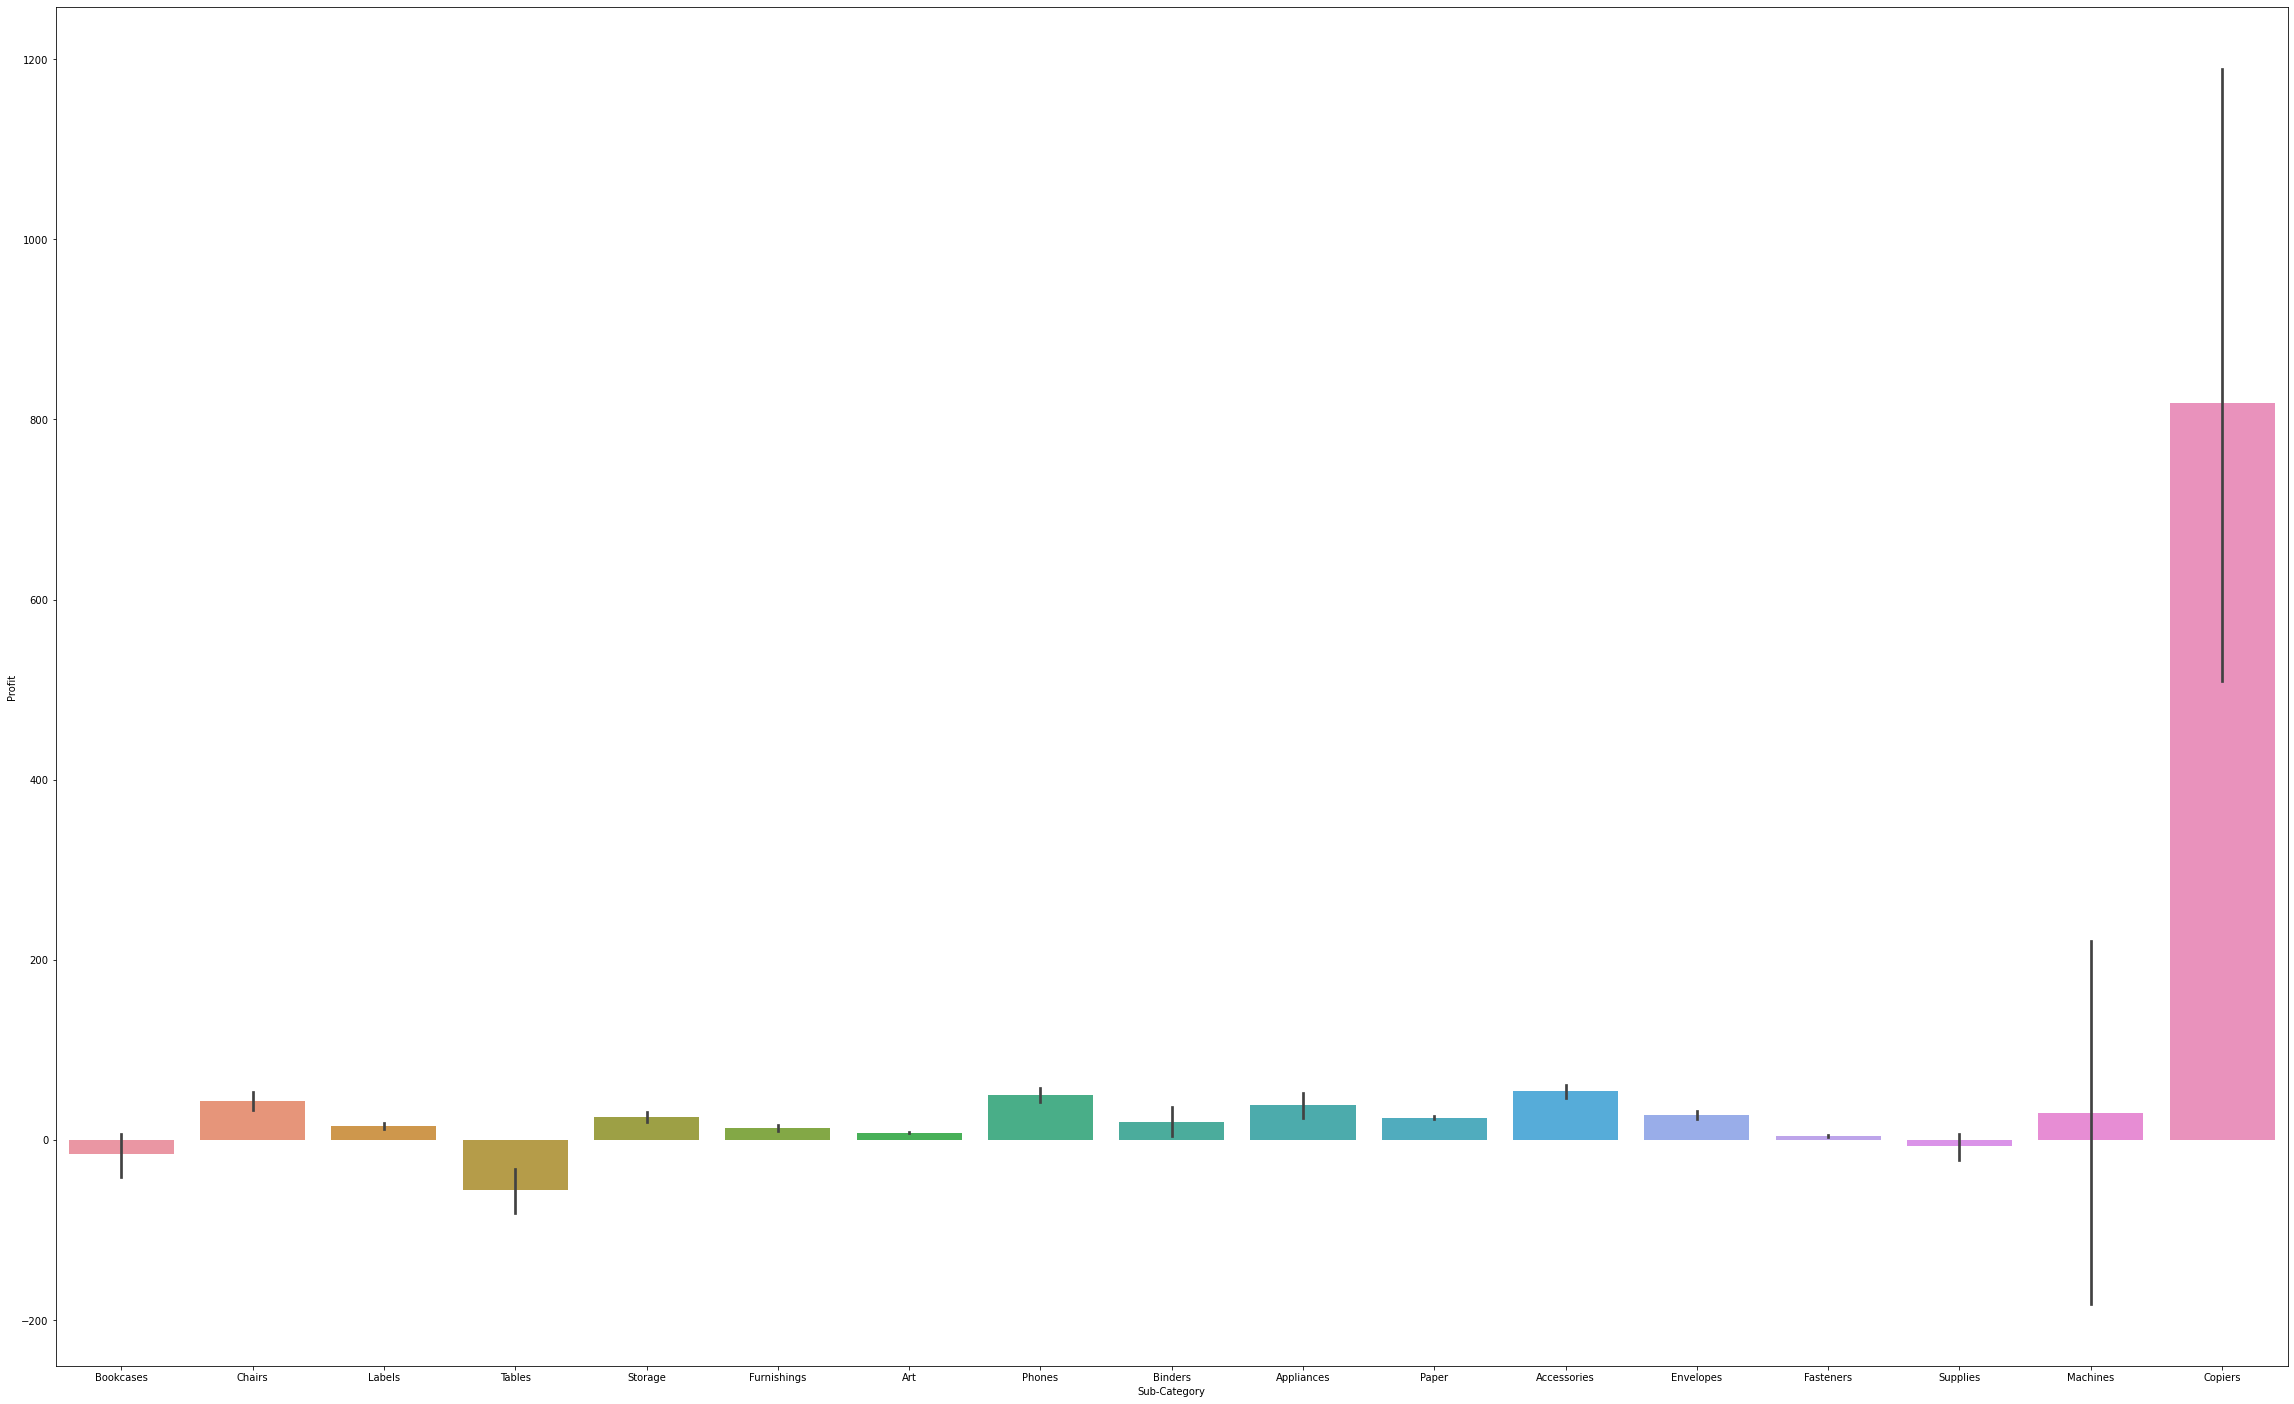

In [22]:
plt.figure(figsize=(40,25))
sns.barplot(x=df['Sub-Category'], y=df['Profit']);

### Function return Series with number of distinct observations over requested axis

In [23]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Find the correlation of dataset

In [24]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


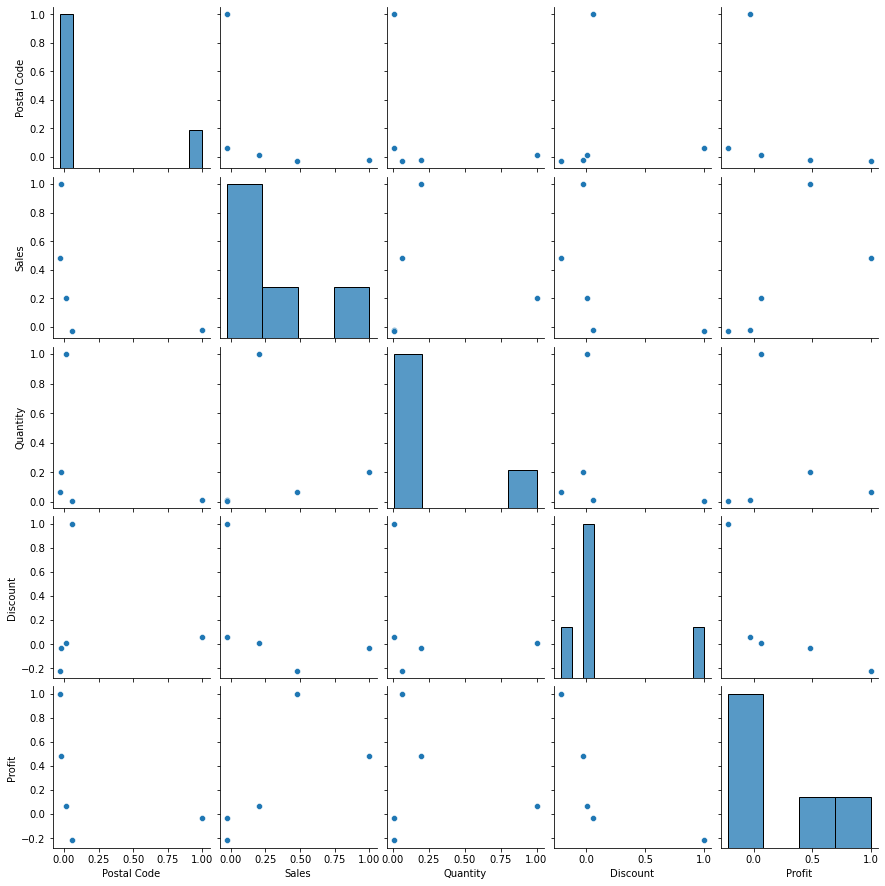

In [25]:
sns.pairplot(df.corr());

### Find the covariance of dataset

In [26]:
df.cov()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445
Sales,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586
Quantity,9.104159e+02,278.459923,4.951113,0.003961,34.534769
Discount,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173
Profit,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055


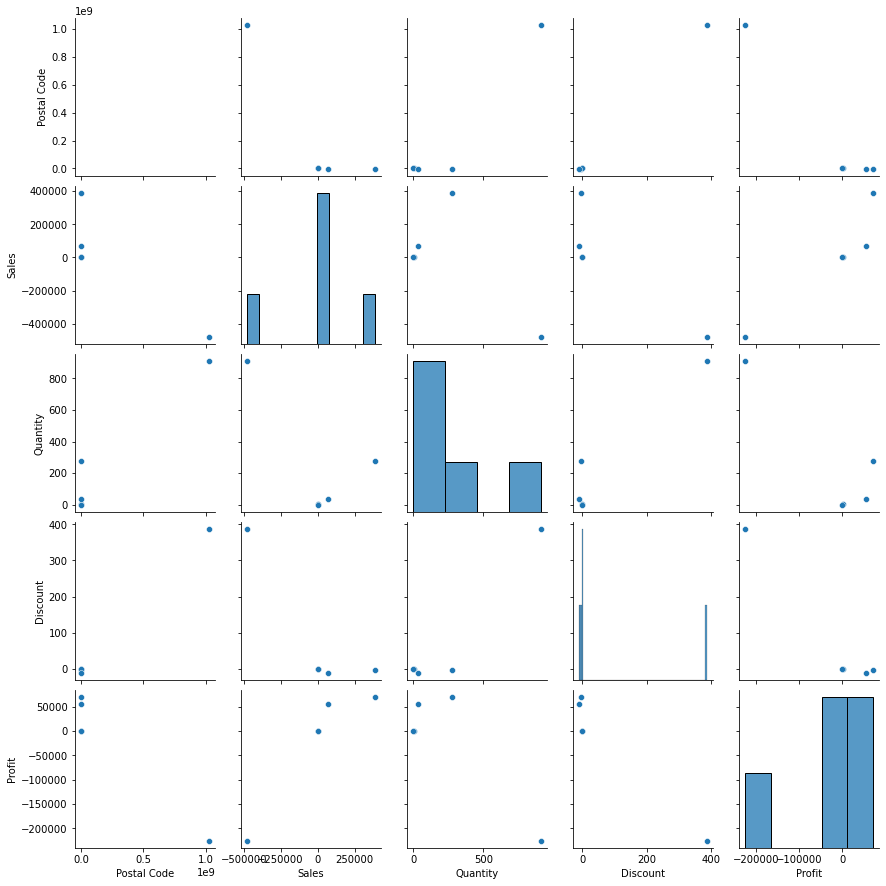

In [27]:
sns.pairplot(df.cov());

### Histogram representation of numerical attributes

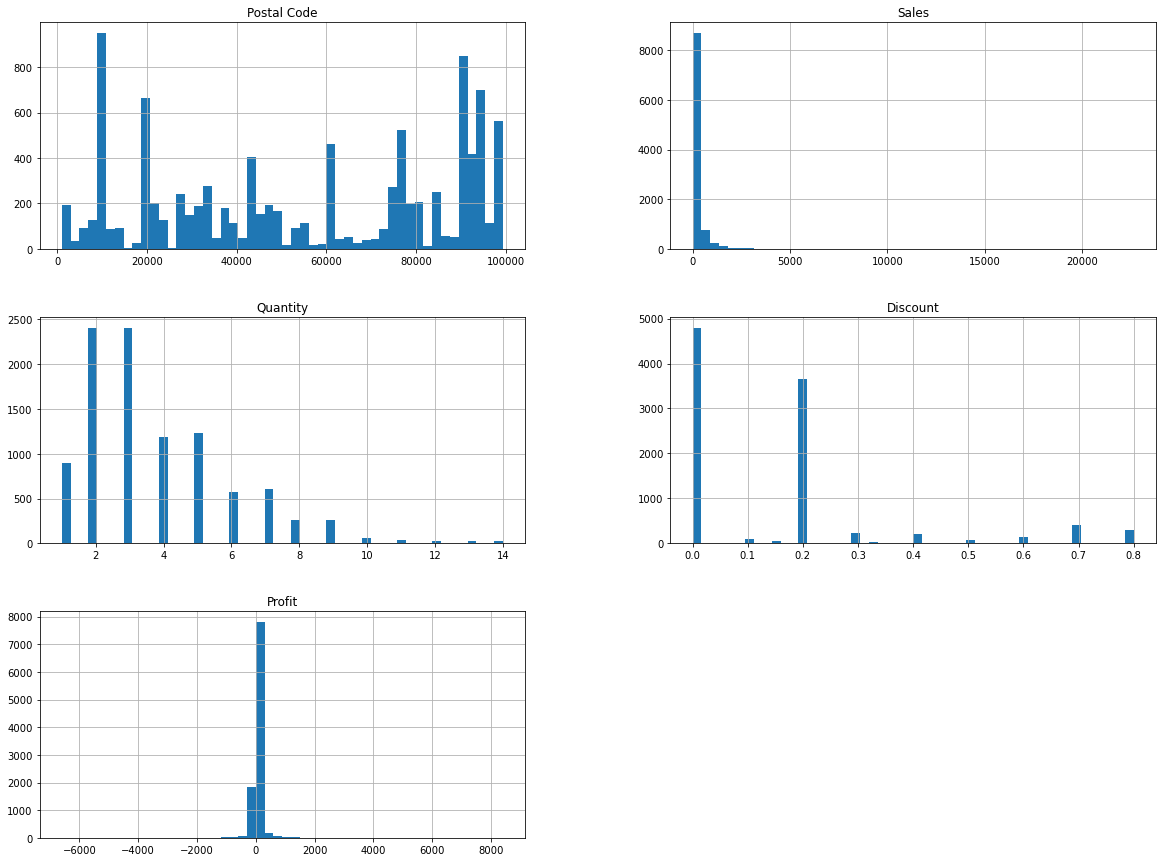

In [28]:
df.hist(bins=50 ,figsize=(20,15))
plt.show();

## HEATMAP OF DATASET

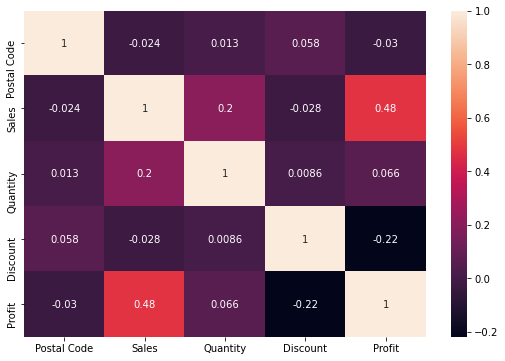

In [29]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df.corr(), annot= True)
plt.show()

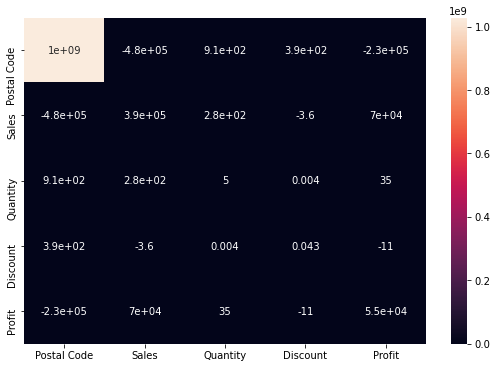

In [30]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df.cov(), annot= True)
plt.show()

## CORRELATION GRAPH

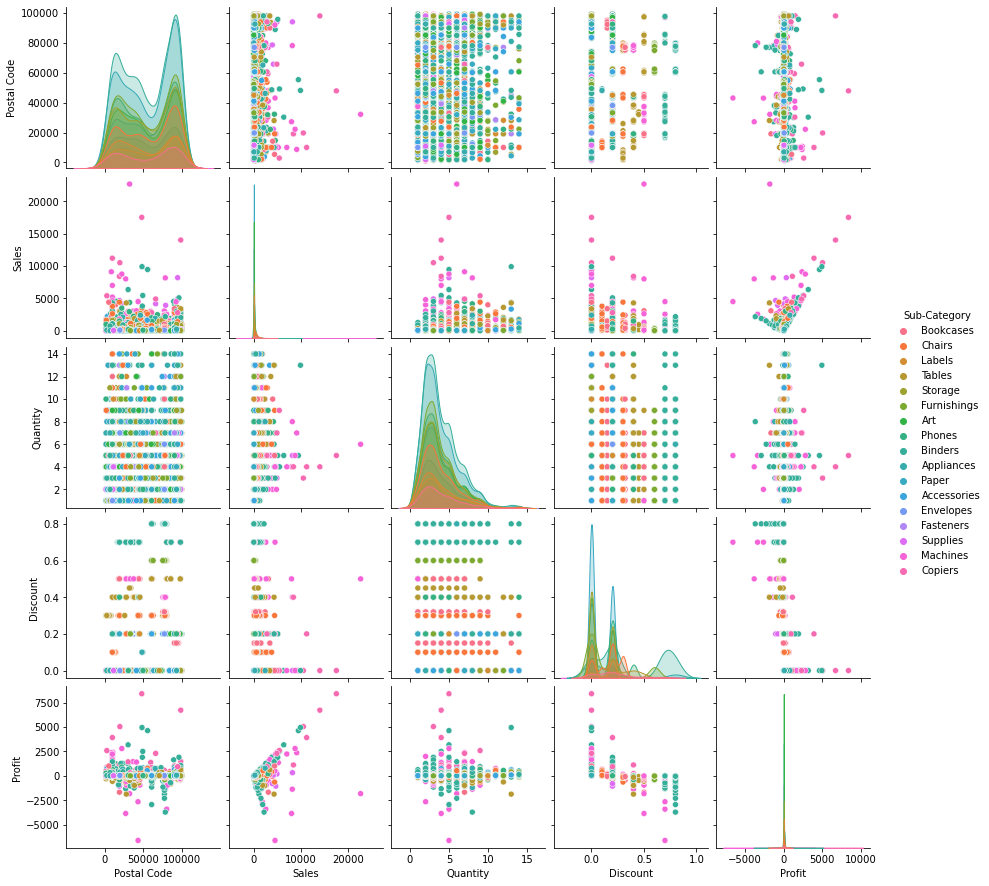

In [4]:
sns.pairplot(df,hue='Sub-Category');

### Grouping of the data to konw profit for each sub-category

In [32]:
df.groupby(['Category','Sub-Category']).count()[['Profit']]


Profit
Category        Sub-Category        
Furniture       Bookcases        228
                Chairs           617
                Furnishings      957
                Tables           319
Office Supplies Appliances       466
                Art              796
                Binders         1523
                Envelopes        254
                Fasteners        217
                Labels           364
                Paper           1370
                Storage          846
                Supplies         190
Technology      Accessories      775
                Copiers           68
                Machines         115
                Phones           889

Profit of binders is the maximum and copiers is the least

### So Now we Grouped or sum the sales ,profit,discount,quantity according to every state of region and also according to sub-categories sales

In [34]:
grouped=pd.DataFrame(df.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount',
                                                'Sales','Profit'].sum().reset_index())
grouped

<ipython-input-34-93953c1c5cb3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped=pd.DataFrame(df.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount',


,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


### Sum,mean,min,max,count median,standard deviation,Variance of each states of Profit 

In [35]:
df.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770
